## **Task 1:- Prediction using Supervised ML**

### **<u>Marks Prediction Using Linear Regression</u>**
In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


**Author - Akanksha Singh | GRIP-August'21**

In [2]:
# Importing libraries and giving alias to the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Reading data from remote link
site = "http://bit.ly/w-data"
source_data = pd.read_csv(site)
print("Data is imported")

Data is imported


In [4]:
# checking data defination and columns 
source_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now performing **bivariate analysis** by plotting scatter plot find any relationship between the data. We can create the plot with the following script: We have x as hours ( on x-axis) and Scores as Y (on y axis)

In [5]:
#For checking if there are any null values in a dataset we can use isnull from pandas.
#sum() for checking the number of Nan
source_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

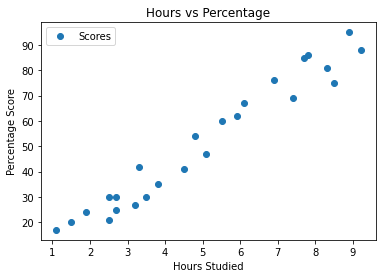

In [6]:
# Plotting the distribution of scores
source_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Above Graph, clearly give us a picture that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Data Prepration**

The next step is to segregating the data into "attributes" (inputs) and "labels" (outputs).<BR><BR>
#### **ABOUT ILOC :-** <BR>
Pandas provide a unique method to retrieve rows from a Data frame. Dataframe.iloc[] method is used when the index label of a data frame is something other than numeric series of 0, 1, 2, 3….n or in case the user doesn’t know the index label. Rows can be extracted using an imaginary index position which isn’t visible in the data frame.

In [7]:
X = source_data.iloc[:, :-1].values  
y = source_data.iloc[:, 1].values 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Model is Trained on test dataset")

Model is Trained on test dataset


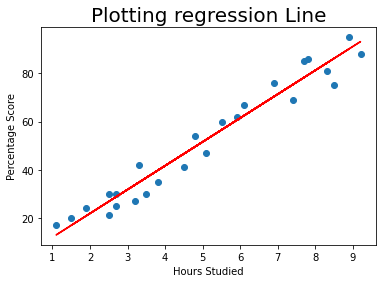

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.title('Plotting regression Line',fontsize=20)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

### **Prediction Time**
As we have trained the model got the regression line now we will make the prediction.

In [14]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
hours = 9.25
own_pred = regressor.predict(np.array([9.25]).reshape(1, 1))
#we have used np.array.reshape as because predict() take a 2D array instead of 1D as we only need to predict for 9.25 hours
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### **Summary**<br>
If a student studies for **9.25 hours** then as per the model he or she will attain **93.69 percentage**